# Function log

Laplacian of Gaussian image.

## Synopse
1D, 2D Laplacian of Gaussian image.

 - **g = ialog(s, mu, sigma)**
     - Output:
         - **g**: Image.
     - Input:
        - **s**: Image. [rows cols], output image dimensions.
        - **mu**: Image. [row0 col0], center of the function.
        - **sigma**: Double. standart deviation.

## Description

Creates a Laplacian of Gaussian image with dimensions given by s, origin given by $\mu$ and standart deviation given by $\sigma$ . This function is used in the Marr-Hildreth filter.


## Function code

In [3]:
import numpy as np

def log(s, mu, sigma):
    mu = np.array(mu)
    s  = np.array(s)
    if np.product(np.shape(s)) == 1:
        x = np.arange(s)
        coord_center = (x-mu)**2
    else:
        (rr, cc) = np.indices( s)
        coord_center = (rr-mu[0])**2  + (cc-mu[1])**2

    gauss_factor = coord_center/(2.*sigma**2)
    gauss_factor_r = np.ravel(gauss_factor)
    
    exp_factor = np.exp(-gauss_factor_r)
    exp_factor = exp_factor.reshape( np.shape(coord_center))
    
    g = -(((1 - gauss_factor )/ (sigma**4 * np.pi)) * exp_factor)
    return g

## Examples

In [1]:
testing = (__name__ == "__main__")

if testing:
    ! jupyter nbconvert --to python log.ipynb
    import sys
    import os
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia
    
    import matplotlib.pyplot as plt
    %matplotlib inline

[NbConvertApp] Converting notebook log.ipynb to python
[NbConvertApp] Writing 4040 bytes to log.py


### Example 1D

#### Numerical example:

In [2]:
if testing:
    s, mu, sigma = 5, 3, 0.8
    F = ia.log(s, mu, sigma)

    print('image dimensions = ', s)
    print('center of function = ', mu)
    print('spread factor =', sigma)
    print('Laplacian of Gaussian image : \n', F.round(2))

image dimensions =  5
center of function =  3
spread factor = 0.8
Laplacian of Gaussian image : 
 [ 0.    0.07 -0.08 -0.78 -0.08]


#### Image exemple:

image dimensions =  256
center of function =  128
spread factor = 8


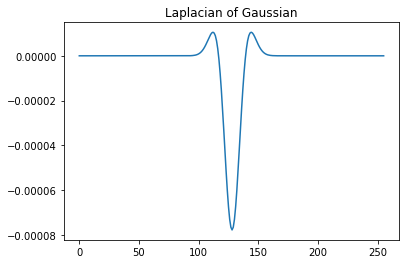

In [3]:
if testing:
   
    
    s, mu, sigma = 256, 128, 8
    F = ia.log(s, mu, sigma)

    print('image dimensions = ', s)
    print('center of function = ', mu)
    print('spread factor =', sigma)

    plt.plot(F)
    plt.title('Laplacian of Gaussian')

### Example 2D

#### Numerical exemple.

In [4]:
if testing:
    s, mu, sigma = [5, 7], [3, 4], .5
    F = ia.log(s, mu, sigma)
    print('image dimensions = ', s)
    print('center of function = ', mu)
    print('spread factor =', sigma)
    print('Laplacian of Gaussian image : \n', F.round(2))

image dimensions =  [5, 7]
center of function =  [3, 4]
spread factor = 0.5
Laplacian of Gaussian image : 
 [[ 0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.01  0.    0.  ]
 [ 0.    0.    0.    0.28  0.69  0.28  0.  ]
 [ 0.    0.    0.01  0.69 -5.09  0.69  0.01]
 [ 0.    0.    0.    0.28  0.69  0.28  0.  ]]


#### Generating a image 2D 128x128, centered at 64x64 and sigma 4:

image dimensions =  [128, 128]
center of function =  [64, 64]
spread factor = 4


""
Laplacian of Gaussian

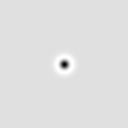

In [5]:
if testing:
    s, mu, sigma = [128, 128], [64, 64], 4
    F = ia.log(s, mu, sigma)
    print('image dimensions = ', s)
    print('center of function = ', mu)
    print('spread factor =', sigma)
    ia.adshow(ia.normalize(F), 'Laplacian of Gaussian')

#### Generating a image 2D 256x256, centered at 128x128 and sigma 20

image dimensions =  [256, 256]
center of function =  [128, 128]
spread factor = 20


""
Laplacian of Gaussian

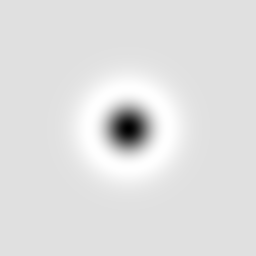

In [6]:
if testing:
    s, mu, sigma = [256, 256], [128, 128], 20
    F = ia.log(s, mu, sigma)
    print('image dimensions = ', s)
    print('center of function = ', mu)
    print('spread factor =', sigma)
    ia.adshow(ia.normalize(F), 'Laplacian of Gaussian')

## Measuring time:

In [7]:
if testing:
    s, mu, sigma = [256, 256], [128, 128], 20
    print('Computational time is:')
    %timeit ia.log(s, mu, sigma)

Computational time is:
100 loops, best of 3: 1.46 ms per loop


## Equation


$$
    \begin{matrix}
        LoG = \frac{1}{\pi\sigma^4}
        \left[
            1 - \frac{(x-\mu_x)^2}{2\sigma^2}
         \right]
         e \frac{-(x-\mu_x)^2}{2\sigma^2}
    \end{matrix}
$$

$$
    \begin{matrix}
        LoG = \frac{1}{\pi\sigma^4}
        \left[
            1 - \frac{(r-\mu_r)^2 + (c-\mu_c)^2}{2\sigma^2}
        \right]
        e \frac{(r-\mu_r)^2 + (c-\mu_c)^2}{2\sigma^2}
    \end{matrix}
$$

## See Also

 - [logfilter]() - Laplacian of Gaussian filter.
 - [Blob detection wikipedia](http://en.wikipedia.org/wiki/Blob_detection)
 - [Laplacian of Gaussian](http://homepages.inf.ed.ac.uk/rbf/HIPR2/log.htm)